In [330]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [331]:
pd.set_option('display.expand_frame_repr', False)
data = pd.read_csv('data/Breast_Cancer.csv')

print("\nSample Data:")
print(data.head())
print("\nDescriptive Statistics:")
print(data.describe())
print("\nDataset Info:")
data.info()


Sample Data:
   Age   Race Marital Status T Stage  N Stage 6th Stage              differentiate Grade   A Stage  Tumor Size Estrogen Status Progesterone Status  Regional Node Examined  Reginol Node Positive  Survival Months Status
0   68  White        Married       T1      N1       IIA      Poorly differentiated     3  Regional           4        Positive            Positive                      24                      1               60  Alive
1   50  White        Married       T2      N2      IIIA  Moderately differentiated     2  Regional          35        Positive            Positive                      14                      5               62  Alive
2   58  White       Divorced       T3      N3      IIIC  Moderately differentiated     2  Regional          63        Positive            Positive                      14                      7               75  Alive
3   58  White        Married       T1      N1       IIA      Poorly differentiated     3  Regional          18    

In [332]:
print("\nColumns with Missing Values:")
print(data.isnull().sum())

print("\nRows with duplicated values:", data.duplicated().sum())


Columns with Missing Values:
Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

Rows with duplicated values: 1



Distribution of numerical variable:


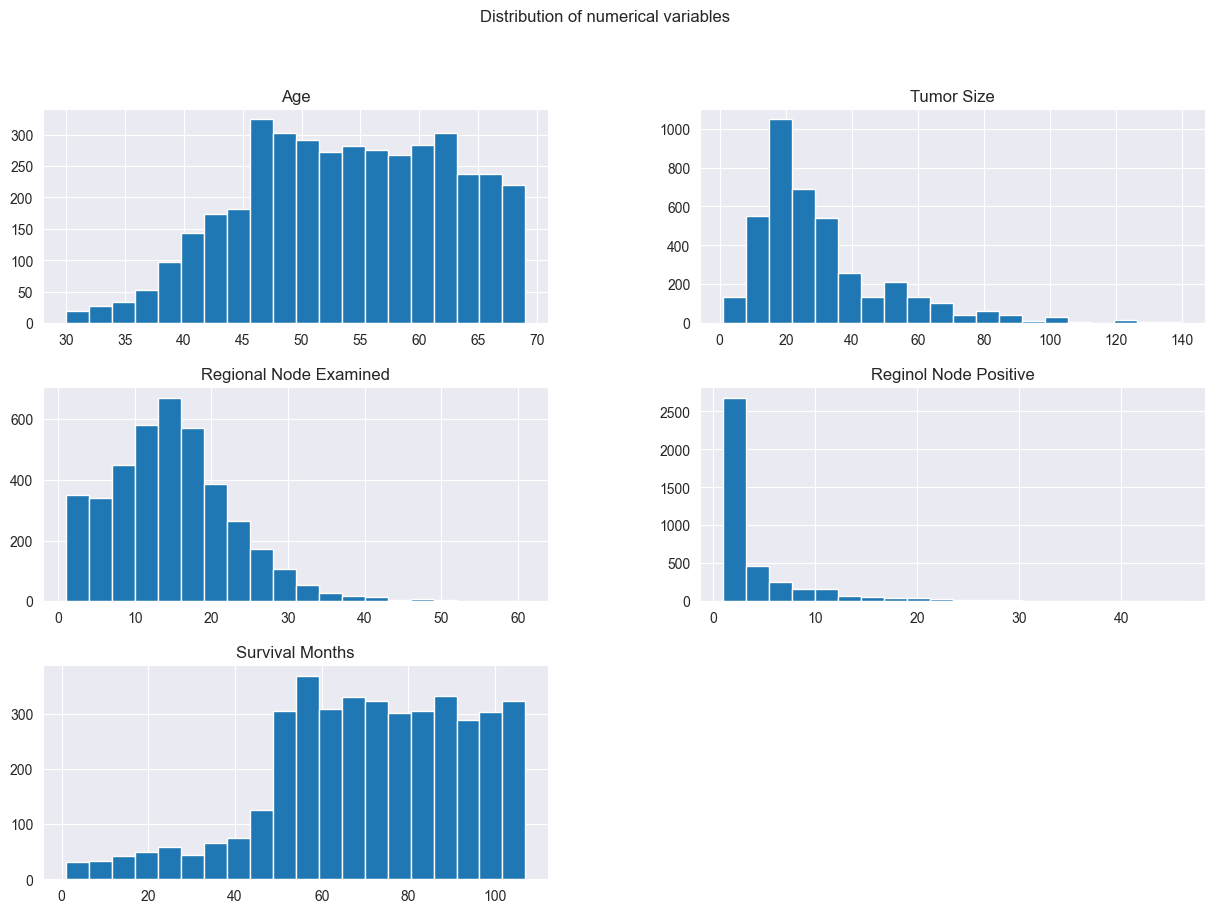

In [333]:
print("\nDistribution of numerical variable:")
data.select_dtypes(include=np.number).hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of numerical variables')
plt.show()


Distribution of categorical variable:


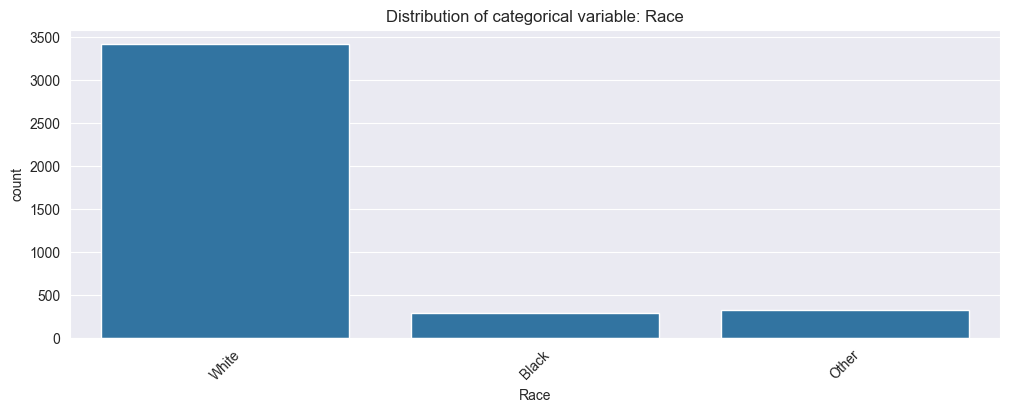

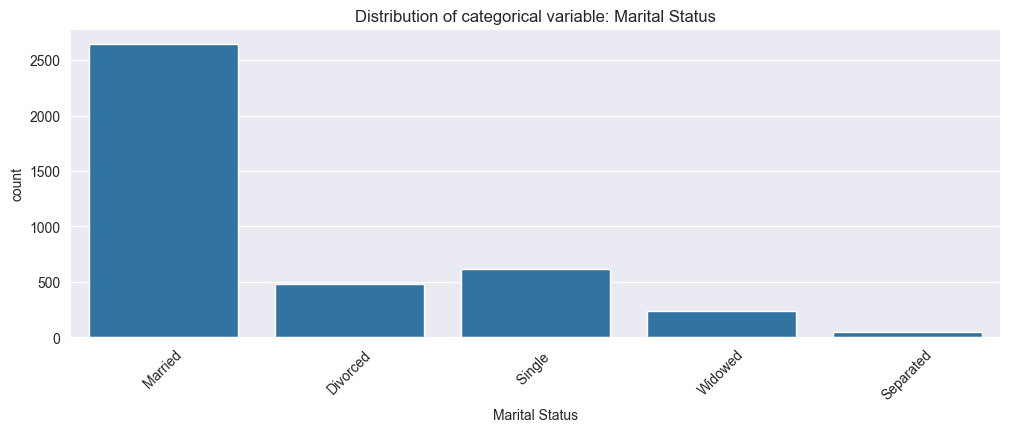

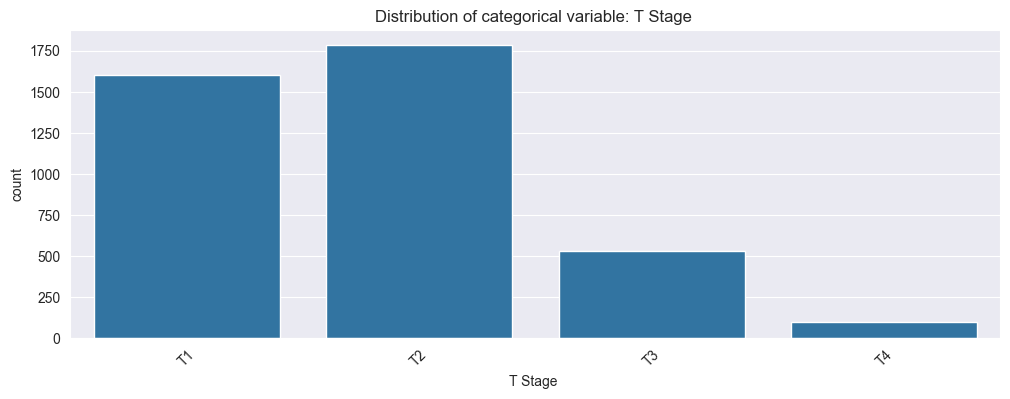

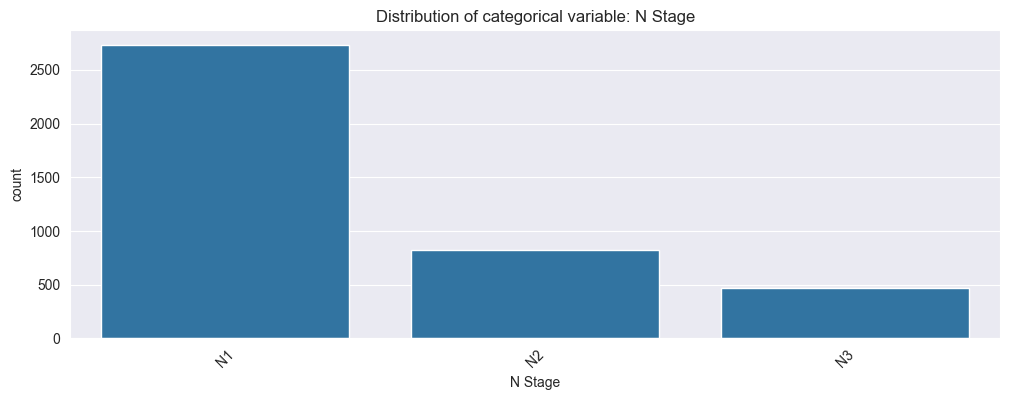

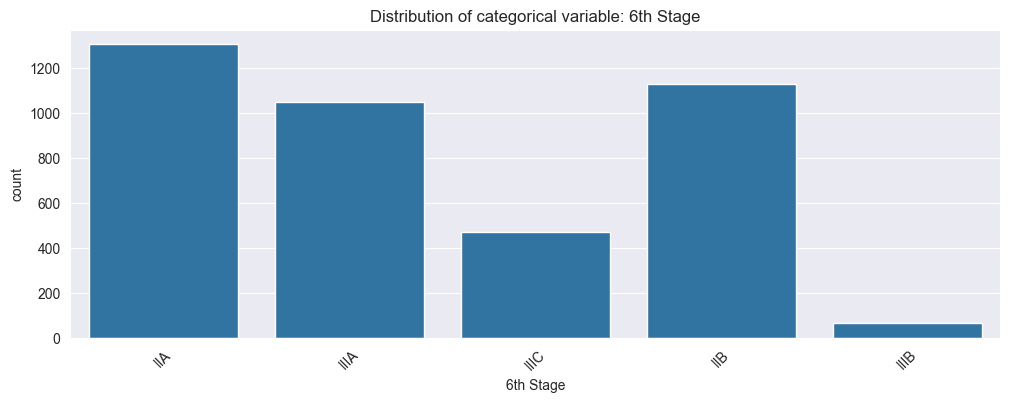

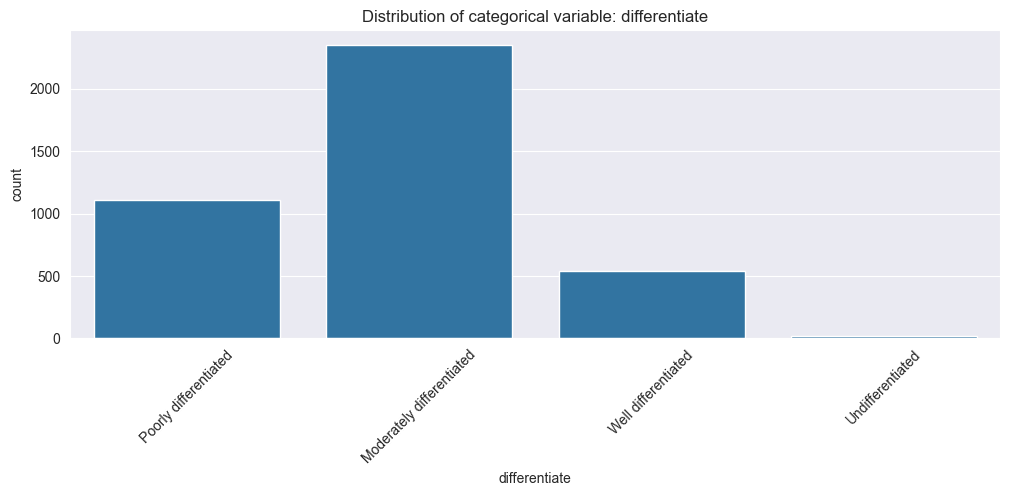

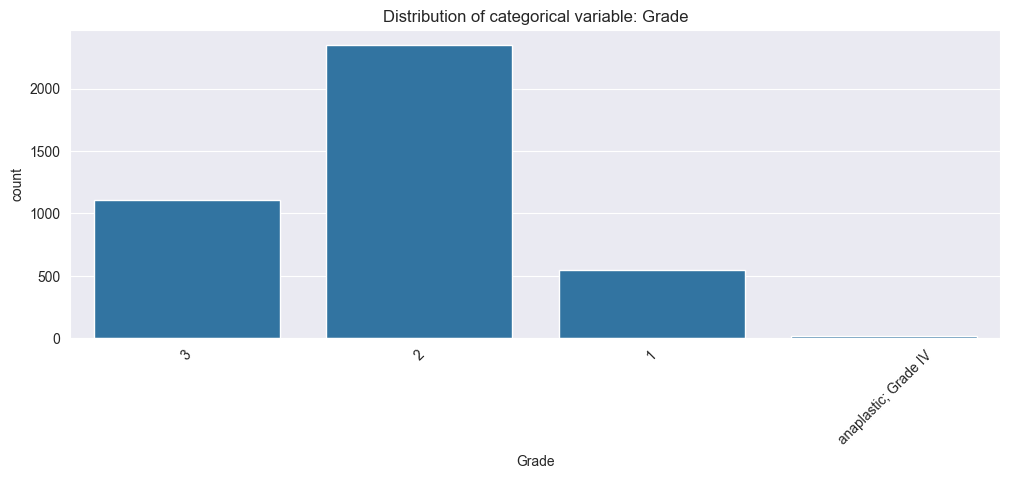

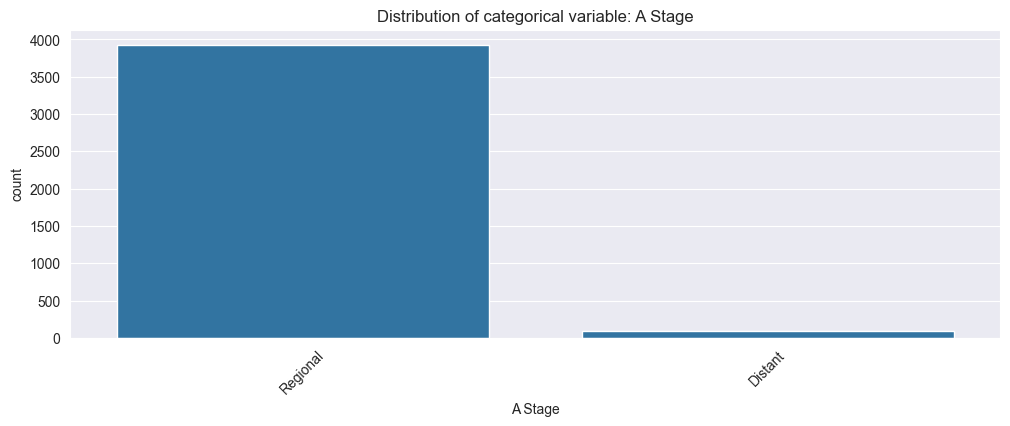

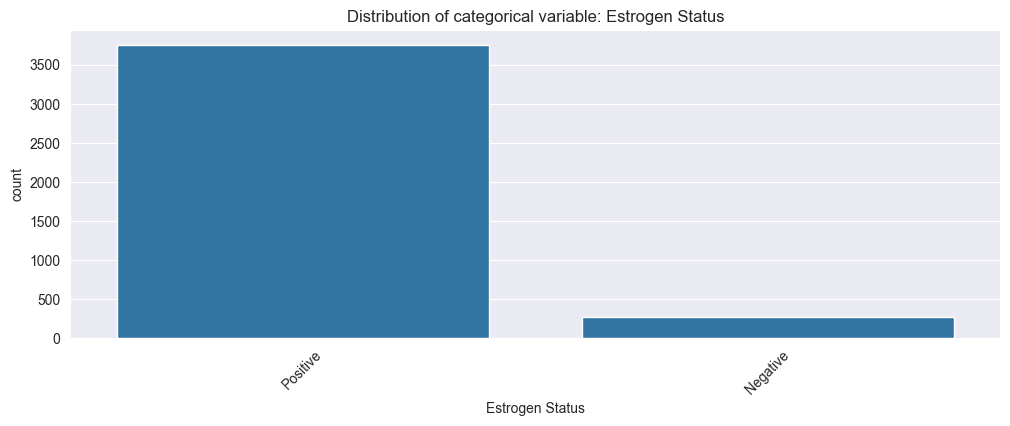

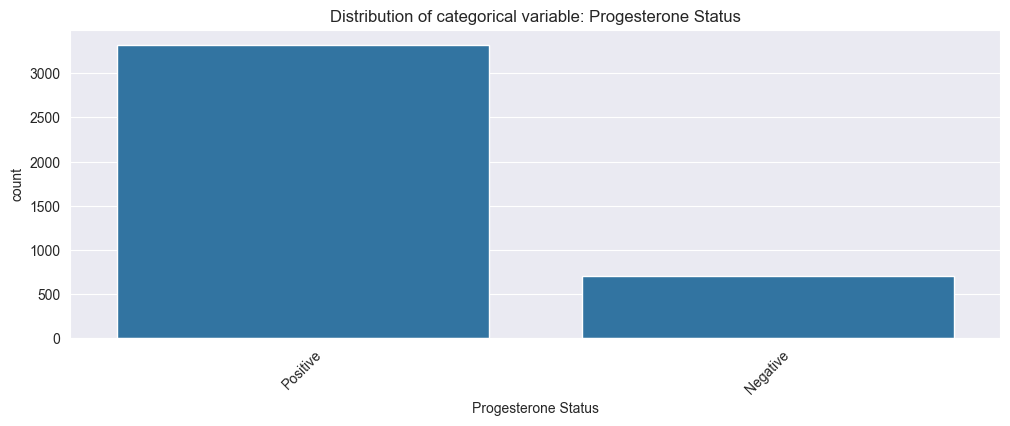

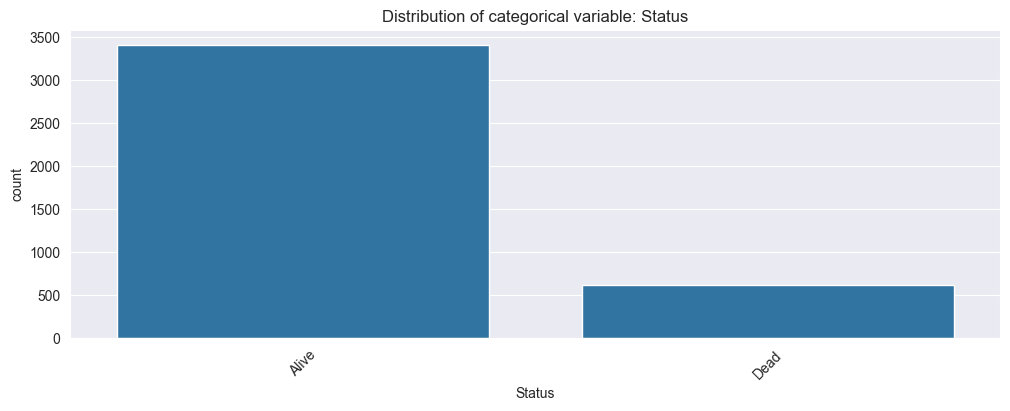

In [334]:
print("\nDistribution of categorical variable:")
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of categorical variable: {col}')
    plt.xticks(rotation=45)
    plt.show()


Box plots for numeric variables:


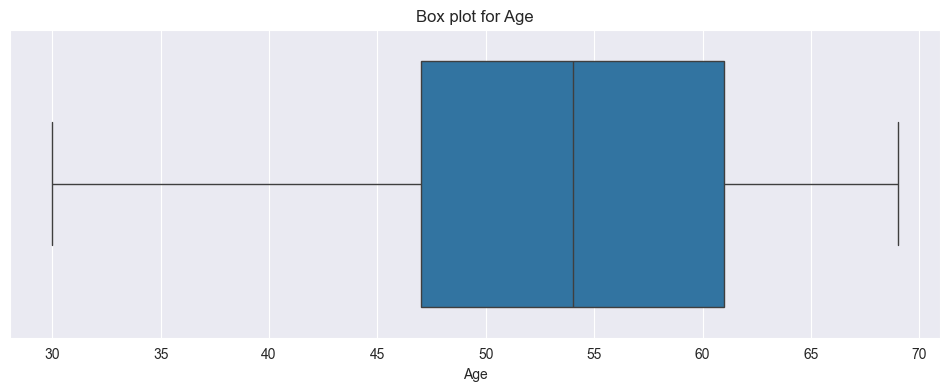

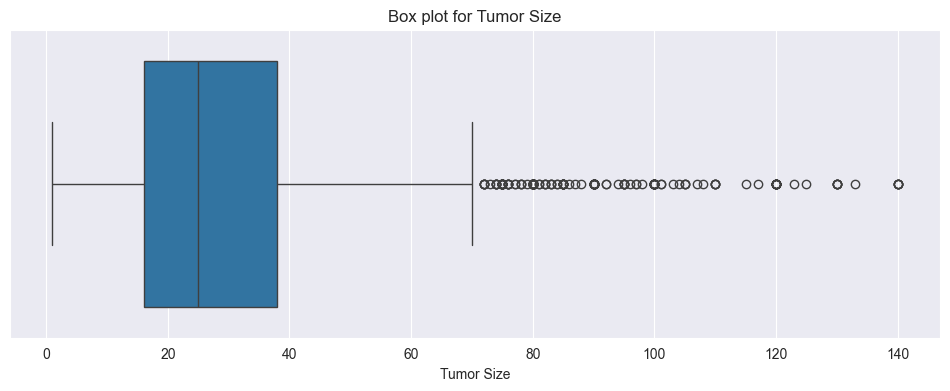

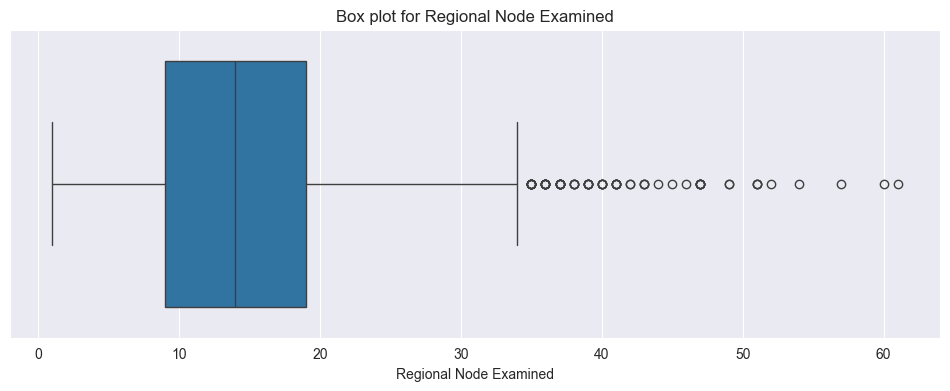

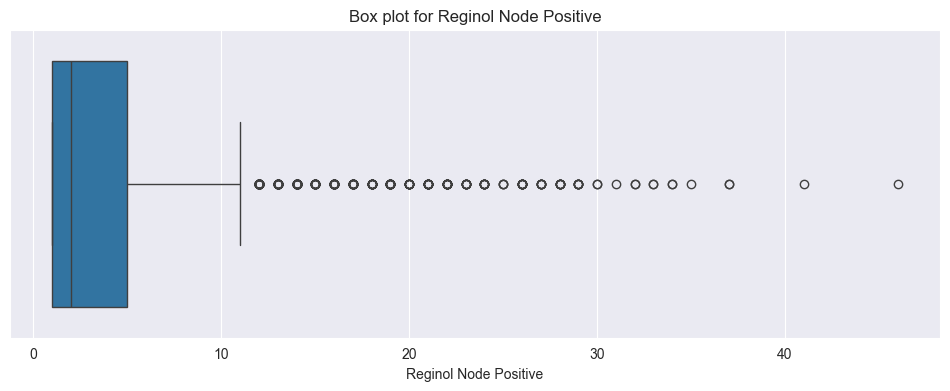

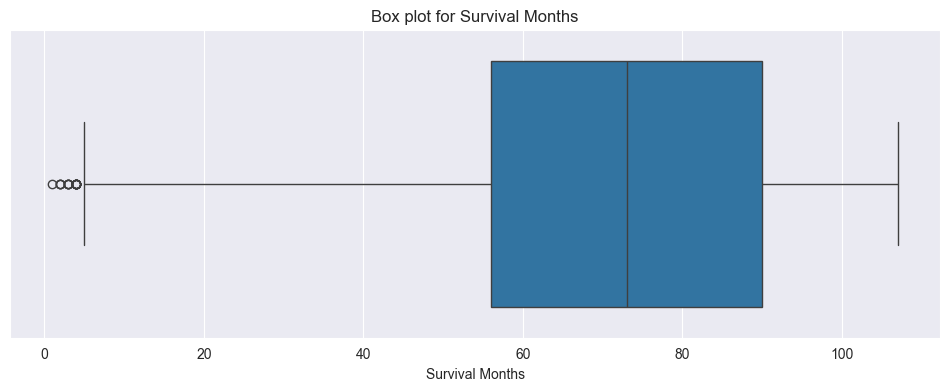

In [335]:
print("\nBox plots for numeric variables:")
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot for {col}')
    plt.show()

In [336]:
data_encoded = data.copy()

encoder = LabelEncoder()
for column in data_encoded.columns:
    if data_encoded[column].dtype == 'object':
        data_encoded[column] = encoder.fit_transform(data_encoded[column])


Correlation matrix:


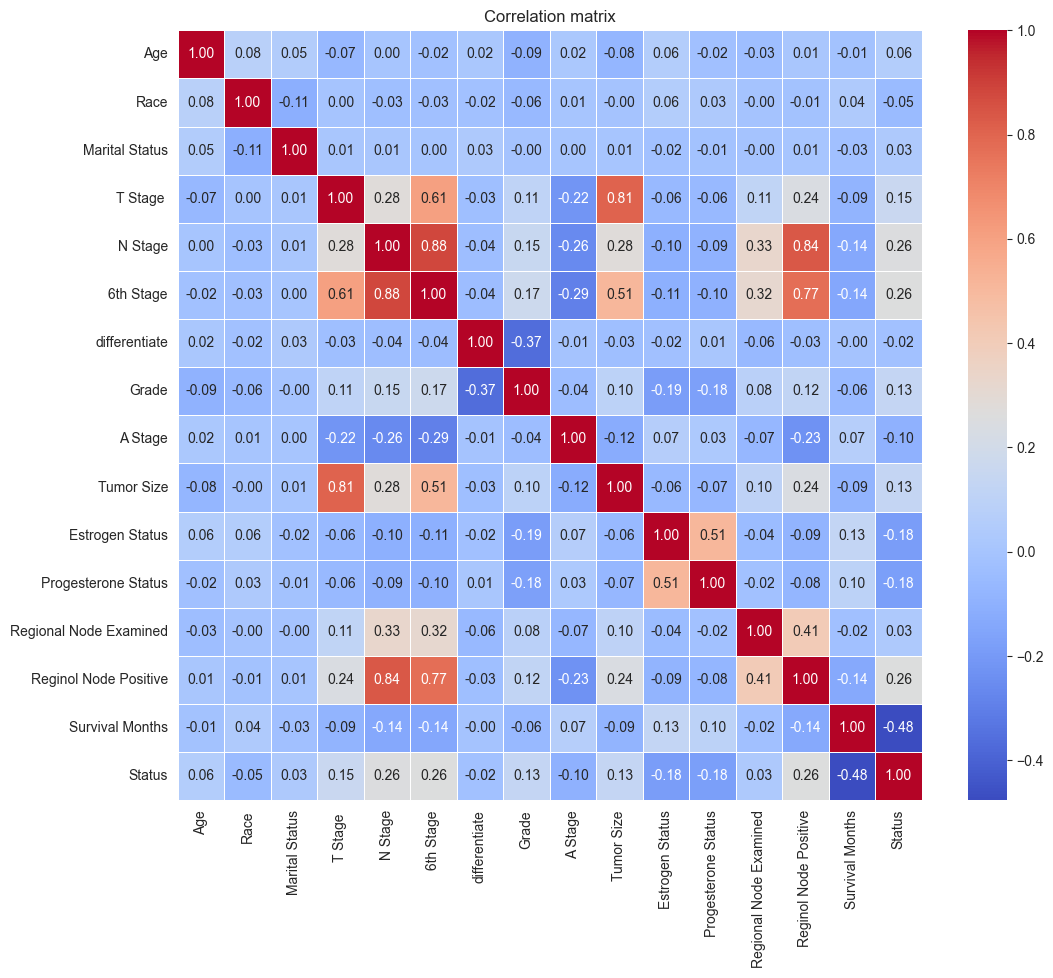

In [337]:
print("\nCorrelation matrix:")
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

In [338]:
X = data_encoded.drop(columns=['Status'])
y = data_encoded['Status']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

print("Features Importance in model:")
for feature, importance in importances_sorted.items():
    print(f"{feature}: {importance:.4f}")

Features Importance in model:
Survival Months: 0.3869
Age: 0.1144
Regional Node Examined: 0.1036
Tumor Size: 0.1024
Reginol Node Positive: 0.0755
Marital Status: 0.0401
6th Stage: 0.0291
N Stage: 0.0233
T Stage : 0.0226
Progesterone Status: 0.0226
Grade: 0.0217
Race: 0.0212
differentiate: 0.0166
Estrogen Status: 0.0161
A Stage: 0.0040


In [339]:
print("\nGenerating EDA Report")
profile = ProfileReport(data, title="EDA Report", explorative=True)
profile.to_file("documentation/eda_report.html")


Generating EDA Report


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [340]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

train_data.to_csv("data/train_data.csv", index=False)
test_data.to_csv("data/test_data.csv", index=False)

Training Data Shape: (2816, 16)
Testing Data Shape: (1208, 16)
